### Linear systems of equations
- augmented matrix (utökad matris).
- Gaussian elimination
- reduced row echelon form (=reducerad trappstegsform) (sympy.rref)
- pivot columns, bound and free varibles

- scipy.linalg.solve

In [179]:
import numpy as np
import sympy as sp

pi_symbol = np.pi

x, y, z, pi = sympy.symbols('x,y,z, pi')

# Two dimensional array
a = np.array([[0,1,2],[pi,4,5],[-1,-2,-3]], dtype=object)

print(type(a), a.ndim, a.size, a.shape)

# sp.pprint(sp.Matrix(a))

sp.Matrix(a)

<class 'numpy.ndarray'> 2 9 (3, 3)


Matrix([
[ 0,  1,  2],
[pi,  4,  5],
[-1, -2, -3]])

In [180]:
# Convert 3D array to 2D
a2d = np.reshape(a, (3,3))

type(sp.Matrix(a))


sympy.matrices.dense.MutableDenseMatrix

Sympy matrices are mutable while ndarrays are immutable.

numpy.linalg.solve requires A to be square:

 A * X = B, where A is a square matrix and X and B are rectangular matrices or vectors.
 
 Gaussian elimination with row interchanges is used to factor A as A = P * L * U , where
 - P = permutation matrix
 - L = unit lower triangular
 - U = is upper triangular.
 
 The factored form of A is then used to solve the above system.

 ---

 Let's create a square matrix and do some basic operations:

In [181]:
# Create array with NumPy
my_matrix = np.array(
    [[3,  2,  -17],
     [7,  8,    4],
     [6,  3,   pi]
])

# Convert to SymPy matrice formating (for notation)
sp.Matrix(my_matrix)

Matrix([
[3, 2, -17],
[7, 8,   4],
[6, 3,  pi]])

In [182]:
# Swap row 3 and 2 by reassigning index
my_matrix[[2,1]] = my_matrix[[1,2]]

# If we print without SymPy it looks like this
my_matrix

array([[3, 2, -17],
       [6, 3, pi],
       [7, 8, 4]], dtype=object)

In [183]:
min_matris = sp.Matrix(my_matrix)

# How to swap with SymPy
min_matris.row_swap(1,0)

min_matris

Matrix([
[6, 3,  pi],
[3, 2, -17],
[7, 8,   4]])

In [191]:
# convert back to NumPy
my_matrix = np.array(min_matris)

# multiply row 1 by 1/2
my_matrix[0] = np.multiply(my_matrix[0],0.5)

sp.Matrix(my_matrix)

Matrix([
[3.0, 1.5, 0.5*pi],
[  3,   2,    -17],
[  7,   8,      4]])

In [194]:
# Row addition works by multiplying one row in the matrix and then adding it to another row.
# For example, in the matrix below, we can multiply row 1 by 4 and add it to row 2:

B = np.matrix(
    [[1,-2],
     [-4,9]])

B[1] = B[1]+B[0]*4

sp.Matrix(B)

Matrix([
[1, -2],
[0,  1]])

---

In [186]:
# with random integers
arr3 = np.random.randint(-8,8, size=(4,4))

print(arr3)
print(f'Sum = {np.sum(arr3)}') # sum
print(f'Sum along diagonals = {np.trace(arr3)}')

print(np.linalg.inv(arr3))

[[-2 -8  5 -5]
 [ 5 -4 -3 -7]
 [ 6 -8 -2  7]
 [-1  2  5 -7]]
Sum = -17
Sum along diagonals = -15
[[-0.10591472  0.03163686  0.13480055  0.17881706]
 [-0.09307657 -0.01765245 -0.00275103  0.08138469]
 [-0.00962861 -0.08803301  0.10316369  0.19807428]
 [-0.01834021 -0.07244383  0.05364512 -0.00366804]]


In [187]:
np.linalg.inv(arr3)

array([[-0.10591472,  0.03163686,  0.13480055,  0.17881706],
       [-0.09307657, -0.01765245, -0.00275103,  0.08138469],
       [-0.00962861, -0.08803301,  0.10316369,  0.19807428],
       [-0.01834021, -0.07244383,  0.05364512, -0.00366804]])

In [197]:
a = np.array([[0,1,-2],[3,4,5],[6,7,-8]])

print(type(a),a.ndim)
print(a)
print()
print(type(a))
print(a.shape, a.ndim)

sp.Matrix(a)

<class 'numpy.ndarray'> 2
[[ 0  1 -2]
 [ 3  4  5]
 [ 6  7 -8]]

<class 'numpy.ndarray'>
(3, 3) 2


Matrix([
[0, 1, -2],
[3, 4,  5],
[6, 7, -8]])

In [202]:
## 2D vector rotation
def rotate_matrix(matrix):
  transposed_matrix = [[matrix[j][i] for j in range(len(matrix))] for i in range(len(matrix[0]))]
  
  # reverse the rows of the transposed matrix
  return [row[::-1] for row in transposed_matrix]

# rotate the matrix
a = rotate_matrix(a)

a = np.array(a)

sp.Matrix(a)

Matrix([
[ 6, 3,  0],
[ 7, 4,  1],
[-8, 5, -2]])

In [196]:
a = sp.Matrix([[ 6,  3,  0],
       [ 7,  4,  1],
       [-8,  5, pi]])

a

Matrix([
[ 6, 3,  0],
[ 7, 4,  1],
[-8, 5, pi]])

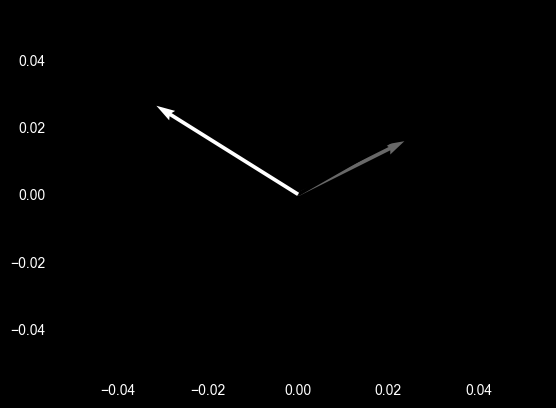

array([[ 6,  3,  0],
       [ 7,  4,  1],
       [-8,  5, -2]])

In [221]:
import matplotlib.pyplot as plt
plt.style.use('dark_background')

V = a
origin = np.array([[0, 0, 0],[0, 0, 0]]) # origin point

plt.quiver(*origin, V[:,0], V[:,1], V[:,2], scale=28)
plt.grid()
plt.show()

V

In [ ]:
def get_rotation_matrix(theta, axis):
    """
    Returns a 3x3 rotation matrix with the given theta and axis
    """

    axis = np.array(axis)
    axis = axis / np.linalg.norm(axis)
    a = np.cos(theta / 2)
    b, c, d = -axis * np.sin(theta / 2)
    aa, bb, cc, dd = a * a, b * b, c * c, d * d
    bc, ad, ac, ab, bd, cd = b * c, a * d, a * c, a * b, b * d, c * d
    return np.array([[aa + bb - cc - dd, 2 * (bc + ad), 2 * (bd - ac)],
                     [2 * (bc - ad), aa + cc - bb - dd, 2 * (cd + ab)]])